In [23]:
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt


In [24]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"


In [25]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id,season_id)).json()
    match_ids = [m['match_id'] for m in matches]

    all_events = []
    for match_id in tqdm(match_ids):
        events = requests.get(url=match_url.format(match_id)).json()
        passes = [x for x in events if x['type']['name'] == 'Pass']
        for a in passes:
            attributes = {
                "player_id": a['player']['id'],
                "outcome": 0 if 'outcome' in a['pass'].keys() else 1,
            }
            all_events.append(attributes)
    return pd.DataFrame(all_events)

In [26]:
competition_id = 43
season_id = 3
df = parse_data(competition_id,season_id)

100%|██████████| 64/64 [00:51<00:00,  1.23it/s]


In [27]:
df.head(20)


,player_id,outcome
0,3043,1
1,3027,0
2,5468,0
3,5527,1
4,3959,0
5,5469,0
6,3959,1
7,3043,0
8,5468,0
9,4763,1


In [28]:
total_passes = df.groupby('player_id')['outcome'].sum()
percentage = df.groupby('player_id')['outcome'].mean()

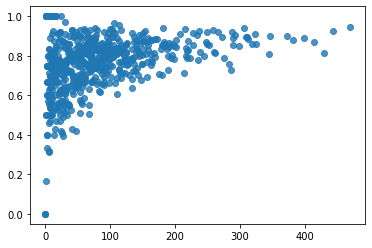

In [29]:
plt.scatter(total_passes,percentage, alpha=0.8)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model =  LinearRegression()
fit = model.fit([[x] for x in total_passes],percentage)
print("Coefficients: {}".format(fit.coef_))
print("Intercept: {}".format(fit.intercept_))

Coefficients: [0.00063207]
Intercept: 0.7094185597471281


In [32]:
xfit = [0,500]
yfit  = model.predict([[x] for x in xfit])

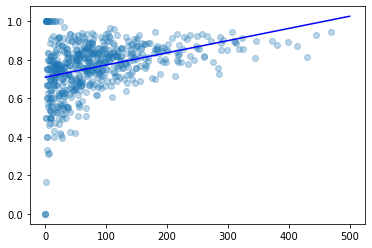

In [33]:
plt.scatter(total_passes,percentage,alpha=0.3)
plt.plot(xfit,yfit,'b')
plt.show()